Sometime when we type message in messenger, after we write a few characters, our phone guess what word we are trying to type and it suggests the completion for us. For example, we type "I am hun", the phone suggest "gry" and this make the sentence "I am hungry". This is an example of characters prediction. The messenger app takes input of a sequnce of character and produces the next character. Messenger can even do better, it suggest next words too.

In this note, we will try to do character recommendation in Khmer. We will use recurrent neural network (RNN) to do this. What we do is that the RNN will take a sequnce of characters and then produce new ones. We will train the RNN to learn to predict characters in the way រឿងគង់ហ៊ាន does, ie our data set is រឿងគង់ហ៊ាន។

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import io

In [2]:
# This is the text data we have
text='កាលពីព្រេងនាយមានមនុស្សម្នាក់ឈ្មោះគង់មានប្រពន្ធពីរនាក់ ១ឈ្មោះនាងអាំ មួយឈ្មោះនាងគំ។ ថៃ្ងមួយអ្នកគង់ នាំប្រពន្ធទាំងពីរនាក់ទៅសួរសុខទុក្ខបងប្អូននៅស្រុកឆ្ងាយ។ តាមផ្លូវទៅស្រុកនោះមាន ខ្លាសាហាវ។ អ្នកគង់បណ្តើរប្រពន្ធទាំងពីរនាក់ទៅដល់ព្រៃធំមួយជិតស្រុកគេ ព្រៃនោះតែងមានខ្លាចេញ ខាំមនុស្ស ក្របី គោស៊ី រឿយៗ។ លុះដល់អ្នកគង់ទៅ​ដល់កនែ្លងនោះ ខ្លាក៏ស្ទុះដេញស្រែកសន្ធាប់ពី ចម្ងាយមក អ្នកគង់រត់ចូលរូងឈើ រាកនោម ព្រោះភ័យញ័រដៃញ័រជើង។ នាងអាំនិងនាងគំខំព្រួតគ្នា វាយខ្លានោះស្លាប់ទៅ។ ឯអ្នកគង់ឃើញប្រពន្ធវាយខ្លាស្លាប់ហើយ បានស្ទុះម្នីម្នាចេញពីរូងឈើមកយកដំបងវាយខ្លាស្លាប់ស្រាប់នោះថែមទៀត។ ប្រពន្ធទាំងពីរបន្ទោសប្តីថា ខ្លាគេវាយងាប់ហើយធើ្វជាមកវាយថែមទៀត ប្រុសអីកំសាកញីដូចេ្នះ ។ អ្នកគង់ជេរបំពានទៅប្រពន្ធថា មិនដែលមានស្រីណាវាយខ្លាស្លាប់ទេ មានតែប្រុសបានហ៊ាន វាយខ្លាទាល់តែស្លាប់។ ហើយអ្នកគង់ក៏បោចវល្លិ៍ចងខ្លានោះ​នាំប្រពន្ធសែងចូលទៅក្នុងស្រុក។ អស់អ្នកស្រុក ឃើញអ្នកគង់សែងខ្លាមក គេបបួលគ្នាមកមើលពេញៗ ហើយគេសួរថា អ្នកឯងធើ្វដូចមេ្តចបានជាចាប់ បានខ្លានេះ ខ្លានេះសាហាវណាស់។ ហើយប្រពន្ធអ្នកគង់ក៏និយាយប្រាប់អ្នកស្រុកថា អ្នកគង់ឃើញខ្លា វាបោលមកគាត់រត់ចូលក្នុងរូងឈើ ខ្ញុំពីរនាក់ស្រីៗព្រួតគ្នាវាយខ្លាទាល់តែស្លាប់។ អ្នកគង់លឺប្រពន្ធ និយាយប្រាប់គេដូច្នោះក៏បញ្ជោររំលោភប្រពន្ធថា មិនដែលមានស្រីណាខ្លាំងហ៊ានវាយខ្លាស្លាប់នោះទេ មានតែប្រុសទើបខ្លាំងពូកែហ៊ានវាយខ្លាស្លាប់បាន ។ អ្នកគង់ក៏អួតប្រាប់អ្នកស្រុកថា កាលដែលខ្លាវាស្ទុះ មកខាំ ខ្ញុំបានប្រើស្នៀតគុណពិសេសរបស់ខ្ញុំ ដូចេ្នះបានជាវាយវាបាន។ ថាហើយអ្នកគង់ធ្វើជាលោតគុណ វាយខ្លាឲ្យអ្នកស្រុកមើល។ ឯអស់អ្នកស្រុកកោតខ្លាចអ្នកគង់តែរាល់គ្នា ហើយឲ្យឈ្មោះថា គង់ហ៊ាន។ តាំងពីថៃ្ងនោះមកលឺល្បីឈ្មោះគង់ហ៊ានជាអ្នកខ្លាំងពូកែចេះគុណវាយខ្លាស្លាប់។ ទឹក​ភ្លៀង ជា​វត្ថុ​ធាតុ​មួយ​ដ៏​វិសេស ទោះ​បី​រុក្ខជាតិ សត្វ​ក្ដី មនុស្ស​ក្ដី សឹង​អាស្រ័យ​ទឹក​ភ្លៀង​ដើម្បី​រស់​ទាំង​អស់ ។ អស់​រដូវ​ប្រាំង​ទាំង​មូល ដែល​នាយ​ឧទ្យាន ខំ​ស្រោច​ស្រព​ដំណាំ​ដោយ​ទឹក តែ​ការ​ចម្រើន​លូត​លាស់​ដំណាំ​នោះ មិន​ស្មើ​នឹង​បាន​ទឹក​ភ្លៀង​ស្រោច​ស្រព​ម្ដង​ទេ ។ ដូច្នេះ​ក្នុង​គ្រា ឬ​ឆ្នាំ​ណា​ដែល​ខ្វះ​ទឹក​ភ្លៀង រមែង​មាន​ហេតុ​ភ័យ​បណ្ដាល​ឡើង​ពីរ​យ៉ាង គឺ ភ័យ​អំពី​ការ​អត់​ឃ្លាន​ម្យ៉ាង ភ័យ​អំពី​រោគា​ព្យាធិ​ម្យ៉ាង ។ ភ័យ​អន្តរាយ​ដ៏​ធំ​ទាំង​ពីរ​យ៉ាង​នេះ​ឯង​ហើយ ជា​កត្តា​ឲ្យ​ទំនៀម​សុំ​ភ្លៀង ទៅ​ជា​ទំនៀម​មួយ​យ៉ាង​សំខាន់ ដែល​ខ្មែរ​យើង​រក្សា​ទុក បាន​ឋិត​ថេរ​ត​មក ។ ការ​រាំង​ភ្លៀង តែង​ធ្វើ​ឲ្យ​សត្វ​លោក​រង​ទុក្ខ​វេទនា​ខ្លាំង​បំផុត2 ។ ក្នុង​កាល​កន្លង​ទៅ​ហើយ ព្រះ​សម្មា​សម្ពុទ្ធ​បរម​គ្រូ​នៃ​យើង ព្រះ​អង្គ​ទ្រង់​យោន​យក​កំណើត​ជា​សត្វ​ត្រី​រ៉ស់ ស្ថិត​នៅ​ក្នុង​ស្រះ​មួយ នា​វស្ស​បុរី ។ កាល​នោះ ក្នុង​វស្ស​បុរី​ទាំង​មូល ពុំ​មាន​បង្អោរ​ភ្លៀង​ចុះ​សោះ, លុះ​រាំងរឹះ​យូរ​ៗ ទៅ ទឹក​បឹង ទឹក​ត្រពាំង ក៏​រីង​ហួត​អស់ ។ ចំណែក​ស្រះ​ដែល​មាន​ស្ដេច​ត្រី​រ៉ស់​នៅ​នោះ ក៏​រីង​ខ្លះ​ដែរ នៅ​សល់​តែ​ភក់​ខាប់ ។ ពេល​នោះ ពួក​ត្មាត កុក និង ក្រសារ​ទាំង​ឡាយ នាំ​គ្នា​ចុះ​ចឹក​ត្រី​នៅ​ក្នុង​ស្រះ​ស៊ី​យ៉ាង​រីករាយ ជា​រៀង​រាល់​ថ្ងៃ ។ ស្ដេច​ត្រី​រ៉ស់ ក៏​បង្គាប់​ពួក​ត្រី​ទាំង​ឡាយ ឲ្យ​មុជ​ចូល​ជ្រក​លាក់​ខ្លួន​ក្នុង​ភក់​យ៉ាង​វេទនា​ណាស់ ។ ថ្ងៃ​មួយ ស្ដេច​ត្រី​រ៉ស់ ជំនុំ​នឹង​ត្រី​រងគ្រោះ​ឯ​ទៀត​ថា តាំង​ពី​ពួក​យើង​មក​ចាប់​កំណើត​ជា​ត្រី​នេះ មិន​ដែល​ធ្វើ​អ្វី​បៀតបៀន​សត្វ​ណា​ម្ដង​ទេ មិន​គួរ​ឡើយ យើង​មក​ទទួល​ការ​លំបាក​យ៉ាង​នេះ​សោះ" ។ គ្រា​នោះ ស្ដេច​ត្រី​រ៉ស់ តាំង​អធិដ្ឋាន​បួង​សួង​នឹក​ដល់​គុណ​ព្រះ​រតន​ត្រ័យ​ថា សូម​តេជះ​គុណ​កែវ​ទាំង ៣ ជា​ទី​ពឹង​របស់​សត្វ​លោក សូម​ព្រះ​អង្គ​ជួយ​ស្រោច​ស្រង់​យើង​ទាំងឡាយ​ផង នៅ​ពេល​នោះ ក៏​កើត​ហេតុ​អស្ចារ្យ គឺ​ក្ដៅ​ដល់​ទៅ​អាសនា​ព្រះ​អម្រិន្ទាធិរាជ ។ បាន​ជ្រាប​ហេតុ​អស្ចារ្យ​ដូច្នេះ ព្រះ​ឥន្ទ្រាធិរាជ ទ្រង់​ត្រាស់​ប្រើ​ទេវ​បុត្ត ១ អង្គ ឲ្យ​បង្អុរ​ភ្លៀង​ចុះ​មក​សព្វ​ទិស​ទី លិច​ទី​ទាប​គ្មាន​សល់ ។ ស្ដេច​ត្រី​រ៉ស់ ព្រម​ទាំង​ពពួក​ត្រី​ទាំងឡាយ បាន​សេចក្ដី​សុខ​សប្បាយ តាំង​ពី​ពេល​នោះ​មក ។ដោយ​មាន​រឿង​អស្ចារ្យ​យ៉ាង​នេះ​ឯង​ហើយ ទើប​កាល​ណា​មាន​ការ​រាំងរឹះ អ្នក​ស្រុក តែង​នាំ​គ្នា​ធ្វើ​ពិធី​សុំ​ទឹក​ភ្លៀង ដោយ​មាន​និមន្ត​ព្រះ​សង្ឃ​សូធ្យ​ធម៌ សុកោន្ថោ មាន​ធ្វើ​ស្រះ​តូច​មួយ ហើយ​រក​ត្រី​រ៉ស់​យក​ទៅ​ដាក់​ឲ្យ​ហែល​ក្នុង​ទឹក​នោះ រួច​ធ្វើ​ពិធី​បួង​សួង​សុំ​ទឹក​ភ្លៀង​ទៅ 4 ។ រឿងនេះជ្រាបទៅដល់សេ្តចៗ  ទ្រង់ឲ្យយកទៅចិញ្ចឹមធ្វើជាសេនាសំរាប់ច្បាំងសង្រ្គាម។ លុះដល់យូរបន្តិចទៅ ជួនជាមានសឹកគេលើកមកច្បាំងយកនគរ សេ្តចទ្រង់ប្រើគង់ហ៊ានឲ្យទៅច្បាំង។ គង់ហ៊ានលឺសេ្តចទ្រង់ប្រើឲ្យទៅជួយច្បាំងសឹកសង្រ្គាមដូច្នោះ ភ័យណាស់ ពុំដឹងធើ្វមេ្តចនឹងប្រកែកបាន ដ្បិតសេ្តចទ្រង់ប្រើហើយ ហើយខ្លួនបានទាំងល្បីឈ្មោះជាអ្នកខ្លាំងពូកែផង។ ត្រឡប់មកផ្ទះវិញដេកសន្ធឹងសនៃ្ធ អត់បាយ ប្រពន្ធទាំងពីរនាក់ចូលទៅសួរថា មេ្តចបានជាអ្នកដេកអត់បាយដូចេ្នះ តើមានហេតុភេទប្រការ ដូចមេ្តច? ។ គង់ហ៊ានប្រាប់ថា ដ្បិតសេ្តចទ្រង់ប្រើឲ្យទៅច្បាំងសឹកឥឡូវនេះ បងខ្លាចសឹកនោះណាស់ មិនដឹងបើគិតដូចមេ្តចទេ។ ប្រពន្ធឡើងឆ្លើយថា អ្មកកុំព្រួយចិត្តធានាលើខ្ញុំទាំងអស់ អ្នកក្រោកឡើង ពិសារបាយឲ្យឆែ្អត ងូតទឹកឲ្យសប្បាយខ្លួនចុះ។ គង់ហ៊ានលឹប្រពន្ធលួងលោមដូច្នោះ បានធូរចិត្ត ក្រោកឡើង​ងូតទឹកស៊ីបាយរៀបគឿ្រងប្រដាប់និងទៅច្បាំង។ លុះរៀបរួចហើយដល់បានវេលាល្អ ក៏ចូលទៅក្រាបបង្គំលាសេ្តចទៅច្បាំងយកទាំងប្រពន្ធទៅផង។ គង់ហ៊ានជិះខាងក្បាលដំរី ប្រពន្ធជិះខាងក្រោយ មានរេហ៏ពលហែរហមអមមុខក្រោយជាក្បួនទ័ពតៀ្របត្រាពាសពេញ។ លុះទៅជិតខ្មាំងសត្រូវមើលឃើញ ច្បាស់ប្រាកដគង់ហ៊ានភ័យណាស់លេចអាចម៏ លេចនោម ញ័រដៃញ័ជើងដូចអង្រួនក្បាលដំរី ឯដំរីគិតស្មាន ថាគេអង្រួនឲ្យខ្លួនបោលចូល ក៏ចេះតែបោលមុនរេហ៏ពលទាំងអស់ គ្មាននរណាតាមទាន់។ ឯខ្មាំងសត្រូវឃើញគង់ហ៊ានបំបោលដំរីចូលដូច្នោះ គិតស្មានថាមេទ័ពនេះពូកែណាស់ ក៏បាក់ទ័ពរត់ចាញ់ រត់យកតែប្រាស់អាយុដោយខ្លួនទៅ។ គង់ហ៊ានឃើញខ្មាំងរត់ទាំងអស់ក៏ធើ្វជាអួតកេ្អងក្អាង ឲ្យអស់នាហ្មឺននឹងរេហ៏ពលកោតខ្លាច។ អស់នាហ្មឺន ឃើញគង់ហ៊ានលេចអាចម៏ដាក់ក្បាលដំរី ស្អុយពាសពេញដូច្នោះគេសួរថា លោកមេទ័ពថ្មីមេ្តចក៏លេច លាមកដូចេ្នះ? គង់ហ៊ានឆ្លើយថា បើកំពុងតែច្បាំងនឹងសត្រូវហើយ ឈឺផៃ្ទនឹងចុះទៅដោះទុក្ខសត្វឯណា មានតែដោះទុក្ខសត្វលើក្បាលដំរីដូច្នោះឯង។ បើរវល់តែដោះទុក្ខសត្វ ខ្មាំងវាមិនកាប់ស្លាប់ឥតអំពើទៅហើយអី? ។ អស់នាហ្មឺននឹងរេហ៏ពលលឺគង់ហ៊ាននិយាយដូច្នោះអ្នកខ្លះមានប្រាជ្ញគេដឹងថា គង់ហ៊ានខ្លាច អ្នកខ្លះមិនសូវ មានប្រាជ្ញកោតខ្លាចគង់ហ៊ានណាស់ ឯគង់ហ៊ានបានឈ្នះទ័ព ត្រឡប់ចូលមកនគរវិញ ហើយចូលទៅក្រាបបង្គំ សេ្តច។ សេ្តចទ្រង់ជ្រាបថា គង់ហ៊ានទៅច្បាំងឈ្នះ ដេញខ្មាំងរត់ខ្ចាត់ខ្ចាយអស់ទៅ ទ្រង់ត្រេកអរណាស់ ទ្រង់រាជ ទានយសស័ក្តិជានាហ្មឹនធំ ហើយព្រះរាជទានព្រះរាជទ្រព្យ​និងគឿ្រងបណ្តាការ​ជាច្រើន។ តាំងអំពីថៃ្ងនោះ មកគង់ហ៊ានរិតតែអួត ខ្លាំងពូកែកេ្អងក្អាងឡើងទៀត។ លុះក្រោយមកទៀតមានក្រពើសាហាវមួយ ចេះតែដេញខាំមនុស្សម្នា។ អ្នកឈ្មួញដើររកស៊ីខាងជើងទឹក ជើងកំពង់ គេខ្លាចរអាគ្រប់គ្នា មិនមានអ្នកណាហ៊ានចុះងូតទឹកឬដើរទូកសោះ។ អស់រាស្រ្តពិបាកចិត្តណាស់ រឿងនោះក៏ជ្រាបទៅដល់សេ្តចៗទ្រង់ត្រាស់ប្រើគង់ហ៊ានឲ្យទៅចាប់ក្រពើ។ ឯគង់ហ៊ានលឺព្រះបន្ទូលដូច្នោះ នឹកភ័យណាស់ប៉ុនែ្តមិនហ៊ានទទឹងព្រះបន្ទូលក៏ទទួលថា និងយកអាសារសូមទ្រង់កុំព្រួយព្រះរាជហរទ័យ។ គង់ហ៊ានត្រឡប់មកដល់ផ្ទះនិយាយនឹងប្រពន្ធថា គេហ៏អើយ ! ឥឡូវនេះទ្រង់ឲ្យយើងទៅចាប់ក្រពើ ក្នុងទនេ្ល ដ្បិតក្រពើសាហាវណាស់ម្តងនេះ។ យើងឃើញថាមិនរួចខ្លួនទេ មុខជាក្រពើខាំស្លាប់មិនខាន។ ពីមុន នៅលើគោកគ្រាន់និងមើលទៅឃើញ ឥឡូវនេះនៅក្នុងទឹកធើ្វមេ្តចនិងគេចរួច? ប៉ុនែ្តសេ្តចទ្រង់ប្រើ ហើយនឹងមិនទៅក៏មិនបាន។ បើដូចេ្នះមានតែទៅលោតទឹកឲ្យក្រពើវាខាំស្លាប់តែម្តងទៅ។ គង់ហ៊ាន គិតគ្នានឹងប្រពន្ធដូច្នោះហើយ ក៏ហៅកូនក្មួយមកធើ្វជាទៅចាប់ក្រពើ។ អស់មនុស្សម្នាមហាជនលឺថា គង់ហ៊ានទៅចាប់ក្រពើ ក៏បបួលគ្នាទៅមើលពាសពេញ។ លុះគង់ហ៊ានទៅដល់​កំពង់ទឹកបានឃើញក្រពើ ហែលមកប្របច្រាំង ត្រង់ទីដែលមានដើមឈើពីរដើមដុះជិតគ្នាមានប្រគាប គាត់ក៏ស្ទុះលោតចុះទៅ ក្នុងទឹកត្រង់ទីនោះ​ដោយគិតថាលោតទៅ​ឲ្យក្រពើវាខាំស្លាប់ទៅទេ។ ប៉ុនែ្តក្រពើវាលឺសន្ធឹកគង់ហ៊ានលោតចុះ ក៏ភ្ញាក់ព្រើតប្រឹងលោតឡើងដូចជាគេប្រហកក្នុងប្រគាបឈើ ជាប់ពាក់កណ្តាលខ្លួន​រុលទៅមុខក៏មិនរួច ថយមកក្រោយក៏មិនរួច។ គង់ហ៊ានមុជទៅក្នុងទឹកងើបឡើង ឃើញក្រពើជាប់នឹងដើមឈើដូច្នោះ ស្រែកបង្គាប់ឲ្យកូនក្មួយយកលំពែងមកចាក់កាប់ក្រពើនោះស្លាប់ទៅ។ ឯអ្នកមើលទាំងប៉ុន្មានគេគិតស្មានថា គង់ហ៊ានចាប់ក្រពើនោះបោះមកឲ្យជាប់នឹងមែកឈើ ក៏កោតខ្លាចគង់ហ៊ានក្រៃពេក។ គង់ហ៊ានបានឃើញក្រពើស្លាប់យ៉ាងដូច្នោះ ក៏រិតតែអួតកេ្អងក្អាង​ខ្លាំងពូកែឡើងទៀត ហើយចូលទៅក្រាប ទូលសេ្តចថា ខ្លួនចាប់ក្រពើចោលឡើងមកលើគោក។ សេ្តចទ្រង់ក៏សព្វព្រះរាជហរទ័យ ប្រោសប្រទាន យសស័ក្ដឲ្យគង់ហ៊ានឡើងធំលើសពីមុនទៀត ព្រះរាជទាំងអំណាចនឹងរង្វាន់ជាច្រើន។'
text=text.replace('\u200b', '') # don't worry about this part
print(f'The text length is {len(text)} characters') # len(sequence) tell us the lenght of a squence

The text length is 6809 characters


In [51]:
text_100 = text[:100]
print(text_100)

កាលពីព្រេងនាយមានមនុស្សម្នាក់ឈ្មោះគង់មានប្រពន្ធពីរនាក់ ១ឈ្មោះនាងអាំ មួយឈ្មោះនាងគំ។ ថៃ្ងមួយអ្នកគង់ នាំ


In Python, we can access text (string) in the same way we do with list. In particular, we can locate the character by specifying their location.

In [3]:
#print(text[:30]) # this print the first 30 character of the text
print(text[300:400]) # this code allow us to look at the text from the 300th characters to 400th

គង់ទៅដល់កនែ្លងនោះ ខ្លាក៏ស្ទុះដេញស្រែកសន្ធាប់ពី ចម្ងាយមក អ្នកគង់រត់ចូលរូងឈើ រាកនោម ព្រោះភ័យញ័រដៃញ័រជើ


In [ ]:
vocab=sorted(set(text)) # we appy two operation to text, first we make it a set and then we sort this set
vocab_size=len(vocab) # this compute the length of vocab
print(vocab) # this print the character make up the text
print(f'The number of character in this text is {vocab_size}')

[' ', '!', '"', ',', '2', '4', '?', 'ក', 'ខ', 'គ', 'ឃ', 'ង', 'ច', 'ឆ', 'ជ', 'ឈ', 'ញ', 'ដ', 'ឋ', 'ណ', 'ត', 'ថ', 'ទ', 'ធ', 'ន', 'ប', 'ផ', 'ព', 'ភ', 'ម', 'យ', 'រ', 'ល', 'វ', 'ស', 'ហ', 'ឡ', 'អ', 'ឥ', 'ឧ', 'ឬ', 'ឯ', 'ឲ', 'ា', 'ិ', 'ី', 'ឹ', 'ឺ', 'ុ', 'ូ', 'ួ', 'ើ', 'ឿ', 'ៀ', 'េ', 'ែ', 'ៃ', 'ោ', 'ៅ', 'ំ', 'ះ', '៉', '៊', '់', '៌', '៍', '៏', '័', '្', '។', 'ៗ', '១', '៣']
The number of character in this text is 73


To work with text, each character should be represeted by a number, maybe by its order in the list vocab. To be effective in this, we need to create dictionaries that tell us where a character is. More specifically, we need to translate from character to index and from index to character.

We will use the word and character interchagibly

In [5]:
# to create a dictionary we use {a:b}, a translate to b,
char_to_idx={char:idx for idx,char in enumerate(vocab)} # idx=index, char=character
idx_to_char={idx:char for idx,char in enumerate(vocab)}
#print(char_to_idx)  # you can remove the # to print the dictionary char_to_idx
print(idx_to_char)

{0: ' ', 1: '!', 2: '"', 3: ',', 4: '2', 5: '4', 6: '?', 7: 'ក', 8: 'ខ', 9: 'គ', 10: 'ឃ', 11: 'ង', 12: 'ច', 13: 'ឆ', 14: 'ជ', 15: 'ឈ', 16: 'ញ', 17: 'ដ', 18: 'ឋ', 19: 'ណ', 20: 'ត', 21: 'ថ', 22: 'ទ', 23: 'ធ', 24: 'ន', 25: 'ប', 26: 'ផ', 27: 'ព', 28: 'ភ', 29: 'ម', 30: 'យ', 31: 'រ', 32: 'ល', 33: 'វ', 34: 'ស', 35: 'ហ', 36: 'ឡ', 37: 'អ', 38: 'ឥ', 39: 'ឧ', 40: 'ឬ', 41: 'ឯ', 42: 'ឲ', 43: 'ា', 44: 'ិ', 45: 'ី', 46: 'ឹ', 47: 'ឺ', 48: 'ុ', 49: 'ូ', 50: 'ួ', 51: 'ើ', 52: 'ឿ', 53: 'ៀ', 54: 'េ', 55: 'ែ', 56: 'ៃ', 57: 'ោ', 58: 'ៅ', 59: 'ំ', 60: 'ះ', 61: '៉', 62: '៊', 63: '់', 64: '៌', 65: '៍', 66: '៏', 67: '័', 68: '្', 69: '។', 70: 'ៗ', 71: '១', 72: '៣'}


Now you can see what this dictionary do for us, how it translate our vocabulary back and forth.

In [6]:
print(char_to_idx['គ'])# take ក to e_3=(0,0,0,1,0,....,0) in R^{65}, this is one hot encoding
print(idx_to_char[10])

9
ឃ


As we already discussed in class that number aren't a good representation of characters, and that we should use vector instead. The first we can do is to take character of order $i$, we should take it to $e_i$. This is one-hot-encoding.

In [7]:
def one_hot_encoding(char):
  vec=torch.zeros(vocab_size) # make a vector in R^vocab_size
  idx=char_to_idx[char] # find the index of char in vocab
  vec[idx]=1 # turn vec to the standard unit vector
  return vec

In [8]:
e_9=one_hot_encoding('គ')
e_9

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])

Next we need to build an RNN model. Recall that the equation of RNN is $ h_k=f(x_k,h_{k-1})=\sigma(M_xx_k+M_hh_{k-1}+b_h) $ with $h_k=0$, and $y_k=g(h_k)=M_yh_k+b_y$, where $M$ and $b$ are to be learn from the data. Let's say we want to use sequence of length 3, this mean we feed $x_1,x_2,x_3$ one by one to produce $h_3$ and then we use $h_3$ to predict $x_4$. How? Take soft max of $M_yh_4+b_y$, this give us probability, this probabiltiy tell us where character most like to occure if we observe $x_1,x_2,x_3$ in this order.

Instead of using one hot encoding vector $e_k\in \mathbb{R}^{vec_-size}$, we use lower dimensional vector instead, this mean we change $e_k$ to vector $v_k\in \mathbb{R}^d$. This amount to applying a matrix $E$ to $e_k$, ie $v_k=Ee_k$. So the model will process $v_k$ instead of $e_k$, and $E$ is also a matrix to be learn by the model. \\

This mean the model depends on input size, hidden size, embedding dimension $d$, and output size.

The model take input $w_1,w_2,...,w_L$ of squence of words, $L$ is sequence length, we encode all of them as one hot encoding to be the sequence $e_{i_1},e_{i_2},...,e_{i_L}$, and then we embbed this sequence to be $v_{i_1},v_{i_2},...,x_{i_L}$, this is done via $v_{i_1}=Ee_{i_1}$. The parameter for this process is $E$. Next we feed the sequence $v_{i}$ into RNN to get $h_{i_1},h_{i_2},...,h_{i_L}$. The parameter for this is $M_x,M_h,b_h$. Last we use $h_{i_L}$ to make prediction, this is done via apply $g$ to $h_{i_L}$.

It turns out that in Pytorch, we can bypass the process of evening a word $w$ to hot encoding $e_k$ and then to $v_k$. The function nn.Embedding(input_size,embedding_dim) does that for us. Basically, it takes a character/word to continous embedding.

In [9]:
class RNN(nn.Module):
  def __init__(self,input_size,embedding_dim,hidden_size,output_size,seq_length):
    super(RNN,self).__init__()
    self.input_size=input_size
    self.embedding_dim=embedding_dim
    self.hidden_size=hidden_size
    self.output_size=output_size
    self.seq_length=seq_length
    self.embedding=nn.Embedding(self.input_size,self.embedding_dim) # this embedding matrix E
    self.fc_x=nn.Linear(self.embedding_dim,self.hidden_size) # this affine map M_xx+b_h that take input E[x[i]]
    self.fc_h=nn.Linear(self.hidden_size,self.hidden_size,bias=False) # because there are baise in fc_x already
    self.fc_y=nn.Linear(self.hidden_size,self.output_size) #this is g(h)
  def forward(self, x):
    h = torch.zeros(int(self.hidden_size))  # Initially the memory h is the zero vector
    for i in range(self.seq_length):
        input = self.embedding(x[i])
        h = torch.tanh(self.fc_x(input) + self.fc_h(h))  # Compute h
        y=self.fc_y(h)
    return y

In [10]:
#Now we can fixed a model
vocab_size=len(vocab)
input_size=vocab_size
embedding_dim=64
hidden_size=64
output_size=vocab_size
seq_length=4 # this mean we use 4 characters to predict the next one character
model=RNN(input_size,embedding_dim,hidden_size,output_size,seq_length)  # this defines a fix model for us


Now we can try to count the number of parameter in our model.

In [11]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

17673

Next we create a way to generate new sequence from the model. You probably don't need to care about this text generation code, what it does is it use the model to make prediction.

In [12]:
def text_generation(start_seq, length):
    model.eval()  # Set the model to evaluation mode
    generated_text = start_seq
    input_idx = torch.tensor([char_to_idx[char] for char in start_seq], dtype=torch.long)

    for i in range(length):
        if input_idx.shape[0] < seq_length:
            # Pad the input sequence with zeros if it's shorter than seq_length
            padding = torch.zeros(int(seq_length) - int(input_idx.shape[0]), dtype=torch.long)
            input_idx = torch.cat((input_idx, padding))
        else:
            # Trim the input sequence to the last seq_length characters
            input_idx = input_idx[-seq_length:]

        # Pass the input sequence through the model
        output = model(input_idx)

        # Apply softmax to get probabilities
        prob = F.softmax(output, dim=0)

        # Get the index of the character with the highest probability
        next_idx = torch.argmax(prob)

        # Clamp the index to ensure it's within the valid range
        next_idx = torch.clamp(next_idx, 0, len(idx_to_char) - 1)

        # Convert the index to the corresponding character and append to generated text
        next_char = idx_to_char[next_idx.item()]
        generated_text += next_char

        # Update input_idx by removing the first character and adding the new one
        input_idx = torch.cat((input_idx[1:], next_idx.unsqueeze(0)))

    return generated_text

Before training, the model predict non-sense things. And you will see that during training, the model make better and better sentences.

In [13]:
start_seq='មនុស្ស'
length=100
text_generation(start_seq,length)

'មនុស្សំាងួ់់ ឆែំធដឋុ៊ួ។ជ។៍ៃំឹៅំាងវ?ឹ។នគទឆែំធដឋុ៊ួ។ជ។៍ៃំឹៅំាងវ?ឹ។នគទឆែំធដឋុ៊ួ។ជ។៍ៃំឹៅំាងវ?ឹ។នគទឆែំធដឋុ៊ួ។ជ។'

To train a model we need to specify a loss function, commonly people use the word criterion for that. And we need to choose optimisation algorithm. Here we use Adam algorithm with learning rate lr=0.0003.

In [14]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)
loss_vec=[] # this is a vector used to store the value of the loss function

In [15]:
epoch_num=20
for epoch in range(epoch_num):
  loss_epoch=0
  for i in range(len(text)-seq_length):
    x=text[i:i+seq_length]
    y=text[i+seq_length]
    input=torch.tensor([char_to_idx[char] for char in x],dtype=torch.long)
    y=one_hot_encoding(y)
    optimizer.zero_grad()
    output=model(input)
    loss=criterion(output,y)
    loss.backward()
    optimizer.step()
    # parameter= parameter-lr* gradient
    loss_epoch+=loss.item()
  loss=loss_epoch/len(text)
  loss_vec.append(loss)
  print(f'epoch {epoch} loss {loss}')
  print(text_generation(start_seq,length))

epoch 0 loss 2.9268849403557065
មនុស្សាំងអំស្រះរាជទាំងអំស្រះរាជទាំងអំស្រះរាជទាំងអំស្រះរាជទាំងអំស្រះរាជទាំងអំស្រះរាជទាំងអំស្រះរាជទាំងអំស្រះ
epoch 1 loss 2.647803237932711
មនុស្សព្រះរាជទាំងអំសព្វាប់ក្រះរាជទាំងអំសព្វាប់ក្រះរាជទាំងអំសព្វាប់ក្រះរាជទាំងអំសព្វាប់ក្រះរាជទាំងអំសព្វាប់
epoch 2 loss 2.547807707810976
មនុស្សពីរាជ់ក៏រាជានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទានទាន
epoch 3 loss 2.4995448197419243
មនុស្សព្រះរាជទាំងអានទៀត ក៏រទ័យ ក៏រទ័យ ក៏រទ័យ ក៏រទ័យ ក៏រទ័យ ក៏រទ័យ ក៏រទ័យ ក៏រទ័យ ក៏រទ័យ ក៏រទ័យ ក៏រទ័យ ក៏រទ័
epoch 4 loss 2.4685860149034684
មនុស្សព្រះរាជទាំងអំពីរាជទាំងអំពីរាជទាំងអំពីរាជទាំងអំពីរាជទាំងអំពីរាជទាំងអំពីរាជទាំងអំពីរាជទាំងអំពីរាជទាំងអ
epoch 5 loss 2.445720110753568
មនុស្សព្រះរាជហ្យសពីក្រះរាជហ្យសពីក្រះរាជហ្យសពីក្រះរាជហ្យសពីក្រះរាជហ្យសពីក្រះរាជហ្យសពីក្រះរាជហ្យសពីក្រះរាជហ្
epoch 6 loss 2.4222111362321535
មនុស្សព្រះរាជាប់ក្រោយ ក្រះរាជាប់ក្រោយ ក្រះរាជាប់ក្រោយ ក្រះរាជាប់ក្រោយ ក្រះរាជាប់ក្រោយ ក្រះរាជាប់ក្រោយ ក្រះ
epoch 7 loss 2.404733326904708

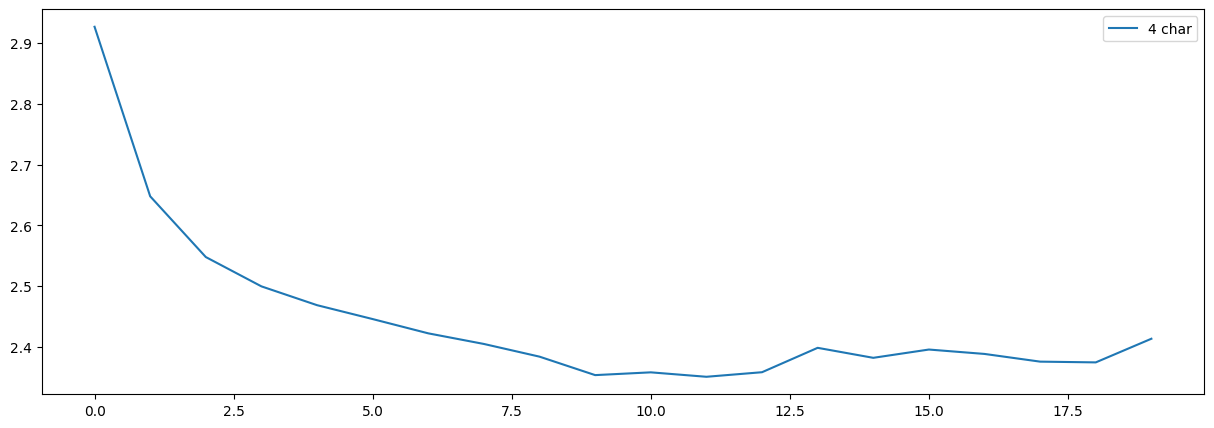

In [16]:
plt.figure(figsize=(15,5))
plt.plot(loss_vec,label='4 char')
plt.legend()

Exercise 1: Do the following discussion.
1. Compare the loss function between using seq_length=4 and 6. Explain why we should see the loss function for seq_length=6 is larger than that of seq_length=4.
2. Find data in ប្រជុំរឿងប្រេងខ្មែរ in wikipedia and add to the text. Make it 5 time larger the current text. And then do step 1 again.

Exercise 2: In the example above, our RNN is one layer. Now create a 2 layers RNN from scratch and train it as shown in the above example. (You should train it on the small data set)

In [33]:
text='កាលពីព្រេងនាយមានមនុស្សម្នាក់ឈ្មោះគង់មានប្រពន្ធពីរនាក់ ១ឈ្មោះនាងអាំ មួយឈ្មោះនាងគំ។ ថៃ្ងមួយអ្នកគង់ នាំប្រពន្ធទាំងពីរនាក់ទៅសួរសុខទុក្ខបងប្អូននៅស្រុកឆ្ងាយ។ តាមផ្លូវទៅស្រុកនោះមាន ខ្លាសាហាវ។ អ្នកគង់បណ្តើរប្រពន្ធទាំងពីរនាក់ទៅដល់ព្រៃធំមួយជិតស្រុកគេ ព្រៃនោះតែងមានខ្លាចេញ ខាំមនុស្ស ក្របី គោស៊ី រឿយៗ។ លុះដល់អ្នកគង់ទៅ​ដល់កនែ្លងនោះ ខ្លាក៏ស្ទុះដេញស្រែកសន្ធាប់ពី ចម្ងាយមក អ្នកគង់រត់ចូលរូងឈើ រាកនោម ព្រោះភ័យញ័រដៃញ័រជើង។ នាងអាំនិងនាងគំខំព្រួតគ្នា វាយខ្លានោះស្លាប់ទៅ។ ឯអ្នកគង់ឃើញប្រពន្ធវាយខ្លាស្លាប់ហើយ បានស្ទុះម្នីម្នាចេញពីរូងឈើមកយកដំបងវាយខ្លាស្លាប់ស្រាប់នោះថែមទៀត។ ប្រពន្ធទាំងពីរបន្ទោសប្តីថា ខ្លាគេវាយងាប់ហើយធើ្វជាមកវាយថែមទៀត ប្រុសអីកំសាកញីដូចេ្នះ ។ អ្នកគង់ជេរបំពានទៅប្រពន្ធថា មិនដែលមានស្រីណាវាយខ្លាស្លាប់ទេ មានតែប្រុសបានហ៊ាន វាយខ្លាទាល់តែស្លាប់។ ហើយអ្នកគង់ក៏បោចវល្លិ៍ចងខ្លានោះ​នាំប្រពន្ធសែងចូលទៅក្នុងស្រុក។ អស់អ្នកស្រុក ឃើញអ្នកគង់សែងខ្លាមក គេបបួលគ្នាមកមើលពេញៗ ហើយគេសួរថា អ្នកឯងធើ្វដូចមេ្តចបានជាចាប់ បានខ្លានេះ ខ្លានេះសាហាវណាស់។ ហើយប្រពន្ធអ្នកគង់ក៏និយាយប្រាប់អ្នកស្រុកថា អ្នកគង់ឃើញខ្លា វាបោលមកគាត់រត់ចូលក្នុងរូងឈើ ខ្ញុំពីរនាក់ស្រីៗព្រួតគ្នាវាយខ្លាទាល់តែស្លាប់។ អ្នកគង់លឺប្រពន្ធ និយាយប្រាប់គេដូច្នោះក៏បញ្ជោររំលោភប្រពន្ធថា មិនដែលមានស្រីណាខ្លាំងហ៊ានវាយខ្លាស្លាប់នោះទេ មានតែប្រុសទើបខ្លាំងពូកែហ៊ានវាយខ្លាស្លាប់បាន ។ អ្នកគង់ក៏អួតប្រាប់អ្នកស្រុកថា កាលដែលខ្លាវាស្ទុះ មកខាំ ខ្ញុំបានប្រើស្នៀតគុណពិសេសរបស់ខ្ញុំ ដូចេ្នះបានជាវាយវាបាន។ ថាហើយអ្នកគង់ធ្វើជាលោតគុណ វាយខ្លាឲ្យអ្នកស្រុកមើល។ ឯអស់អ្នកស្រុកកោតខ្លាចអ្នកគង់តែរាល់គ្នា ហើយឲ្យឈ្មោះថា គង់ហ៊ាន។ តាំងពីថៃ្ងនោះមកលឺល្បីឈ្មោះគង់ហ៊ានជាអ្នកខ្លាំងពូកែចេះគុណវាយខ្លាស្លាប់។ ទឹក​ភ្លៀង ជា​វត្ថុ​ធាតុ​មួយ​ដ៏​វិសេស ទោះ​បី​រុក្ខជាតិ សត្វ​ក្ដី មនុស្ស​ក្ដី សឹង​អាស្រ័យ​ទឹក​ភ្លៀង​ដើម្បី​រស់​ទាំង​អស់ ។ អស់​រដូវ​ប្រាំង​ទាំង​មូល ដែល​នាយ​ឧទ្យាន ខំ​ស្រោច​ស្រព​ដំណាំ​ដោយ​ទឹក តែ​ការ​ចម្រើន​លូត​លាស់​ដំណាំ​នោះ មិន​ស្មើ​នឹង​បាន​ទឹក​ភ្លៀង​ស្រោច​ស្រព​ម្ដង​ទេ ។ ដូច្នេះ​ក្នុង​គ្រា ឬ​ឆ្នាំ​ណា​ដែល​ខ្វះ​ទឹក​ភ្លៀង រមែង​មាន​ហេតុ​ភ័យ​បណ្ដាល​ឡើង​ពីរ​យ៉ាង គឺ ភ័យ​អំពី​ការ​អត់​ឃ្លាន​ម្យ៉ាង ភ័យ​អំពី​រោគា​ព្យាធិ​ម្យ៉ាង ។ ភ័យ​អន្តរាយ​ដ៏​ធំ​ទាំង​ពីរ​យ៉ាង​នេះ​ឯង​ហើយ ជា​កត្តា​ឲ្យ​ទំនៀម​សុំ​ភ្លៀង ទៅ​ជា​ទំនៀម​មួយ​យ៉ាង​សំខាន់ ដែល​ខ្មែរ​យើង​រក្សា​ទុក បាន​ឋិត​ថេរ​ត​មក ។ ការ​រាំង​ភ្លៀង តែង​ធ្វើ​ឲ្យ​សត្វ​លោក​រង​ទុក្ខ​វេទនា​ខ្លាំង​បំផុត2 ។ ក្នុង​កាល​កន្លង​ទៅ​ហើយ ព្រះ​សម្មា​សម្ពុទ្ធ​បរម​គ្រូ​នៃ​យើង ព្រះ​អង្គ​ទ្រង់​យោន​យក​កំណើត​ជា​សត្វ​ត្រី​រ៉ស់ ស្ថិត​នៅ​ក្នុង​ស្រះ​មួយ នា​វស្ស​បុរី ។ កាល​នោះ ក្នុង​វស្ស​បុរី​ទាំង​មូល ពុំ​មាន​បង្អោរ​ភ្លៀង​ចុះ​សោះ, លុះ​រាំងរឹះ​យូរ​ៗ ទៅ ទឹក​បឹង ទឹក​ត្រពាំង ក៏​រីង​ហួត​អស់ ។ ចំណែក​ស្រះ​ដែល​មាន​ស្ដេច​ត្រី​រ៉ស់​នៅ​នោះ ក៏​រីង​ខ្លះ​ដែរ នៅ​សល់​តែ​ភក់​ខាប់ ។ ពេល​នោះ ពួក​ត្មាត កុក និង ក្រសារ​ទាំង​ឡាយ នាំ​គ្នា​ចុះ​ចឹក​ត្រី​នៅ​ក្នុង​ស្រះ​ស៊ី​យ៉ាង​រីករាយ ជា​រៀង​រាល់​ថ្ងៃ ។ ស្ដេច​ត្រី​រ៉ស់ ក៏​បង្គាប់​ពួក​ត្រី​ទាំង​ឡាយ ឲ្យ​មុជ​ចូល​ជ្រក​លាក់​ខ្លួន​ក្នុង​ភក់​យ៉ាង​វេទនា​ណាស់ ។ ថ្ងៃ​មួយ ស្ដេច​ត្រី​រ៉ស់ ជំនុំ​នឹង​ត្រី​រងគ្រោះ​ឯ​ទៀត​ថា តាំង​ពី​ពួក​យើង​មក​ចាប់​កំណើត​ជា​ត្រី​នេះ មិន​ដែល​ធ្វើ​អ្វី​បៀតបៀន​សត្វ​ណា​ម្ដង​ទេ មិន​គួរ​ឡើយ យើង​មក​ទទួល​ការ​លំបាក​យ៉ាង​នេះ​សោះ" ។ គ្រា​នោះ ស្ដេច​ត្រី​រ៉ស់ តាំង​អធិដ្ឋាន​បួង​សួង​នឹក​ដល់​គុណ​ព្រះ​រតន​ត្រ័យ​ថា សូម​តេជះ​គុណ​កែវ​ទាំង ៣ ជា​ទី​ពឹង​របស់​សត្វ​លោក សូម​ព្រះ​អង្គ​ជួយ​ស្រោច​ស្រង់​យើង​ទាំងឡាយ​ផង នៅ​ពេល​នោះ ក៏​កើត​ហេតុ​អស្ចារ្យ គឺ​ក្ដៅ​ដល់​ទៅ​អាសនា​ព្រះ​អម្រិន្ទាធិរាជ ។ បាន​ជ្រាប​ហេតុ​អស្ចារ្យ​ដូច្នេះ ព្រះ​ឥន្ទ្រាធិរាជ ទ្រង់​ត្រាស់​ប្រើ​ទេវ​បុត្ត ១ អង្គ ឲ្យ​បង្អុរ​ភ្លៀង​ចុះ​មក​សព្វ​ទិស​ទី លិច​ទី​ទាប​គ្មាន​សល់ ។ ស្ដេច​ត្រី​រ៉ស់ ព្រម​ទាំង​ពពួក​ត្រី​ទាំងឡាយ បាន​សេចក្ដី​សុខ​សប្បាយ តាំង​ពី​ពេល​នោះ​មក ។ដោយ​មាន​រឿង​អស្ចារ្យ​យ៉ាង​នេះ​ឯង​ហើយ ទើប​កាល​ណា​មាន​ការ​រាំងរឹះ អ្នក​ស្រុក តែង​នាំ​គ្នា​ធ្វើ​ពិធី​សុំ​ទឹក​ភ្លៀង ដោយ​មាន​និមន្ត​ព្រះ​សង្ឃ​សូធ្យ​ធម៌ សុកោន្ថោ មាន​ធ្វើ​ស្រះ​តូច​មួយ ហើយ​រក​ត្រី​រ៉ស់​យក​ទៅ​ដាក់​ឲ្យ​ហែល​ក្នុង​ទឹក​នោះ រួច​ធ្វើ​ពិធី​បួង​សួង​សុំ​ទឹក​ភ្លៀង​ទៅ 4 ។ រឿងនេះជ្រាបទៅដល់សេ្តចៗ  ទ្រង់ឲ្យយកទៅចិញ្ចឹមធ្វើជាសេនាសំរាប់ច្បាំងសង្រ្គាម។ លុះដល់យូរបន្តិចទៅ ជួនជាមានសឹកគេលើកមកច្បាំងយកនគរ សេ្តចទ្រង់ប្រើគង់ហ៊ានឲ្យទៅច្បាំង។ គង់ហ៊ានលឺសេ្តចទ្រង់ប្រើឲ្យទៅជួយច្បាំងសឹកសង្រ្គាមដូច្នោះ ភ័យណាស់ ពុំដឹងធើ្វមេ្តចនឹងប្រកែកបាន ដ្បិតសេ្តចទ្រង់ប្រើហើយ ហើយខ្លួនបានទាំងល្បីឈ្មោះជាអ្នកខ្លាំងពូកែផង។ ត្រឡប់មកផ្ទះវិញដេកសន្ធឹងសនៃ្ធ អត់បាយ ប្រពន្ធទាំងពីរនាក់ចូលទៅសួរថា មេ្តចបានជាអ្នកដេកអត់បាយដូចេ្នះ តើមានហេតុភេទប្រការ ដូចមេ្តច? ។ គង់ហ៊ានប្រាប់ថា ដ្បិតសេ្តចទ្រង់ប្រើឲ្យទៅច្បាំងសឹកឥឡូវនេះ បងខ្លាចសឹកនោះណាស់ មិនដឹងបើគិតដូចមេ្តចទេ។ ប្រពន្ធឡើងឆ្លើយថា អ្មកកុំព្រួយចិត្តធានាលើខ្ញុំទាំងអស់ អ្នកក្រោកឡើង ពិសារបាយឲ្យឆែ្អត ងូតទឹកឲ្យសប្បាយខ្លួនចុះ។ គង់ហ៊ានលឹប្រពន្ធលួងលោមដូច្នោះ បានធូរចិត្ត ក្រោកឡើង​ងូតទឹកស៊ីបាយរៀបគឿ្រងប្រដាប់និងទៅច្បាំង។ លុះរៀបរួចហើយដល់បានវេលាល្អ ក៏ចូលទៅក្រាបបង្គំលាសេ្តចទៅច្បាំងយកទាំងប្រពន្ធទៅផង។ គង់ហ៊ានជិះខាងក្បាលដំរី ប្រពន្ធជិះខាងក្រោយ មានរេហ៏ពលហែរហមអមមុខក្រោយជាក្បួនទ័ពតៀ្របត្រាពាសពេញ។ លុះទៅជិតខ្មាំងសត្រូវមើលឃើញ ច្បាស់ប្រាកដគង់ហ៊ានភ័យណាស់លេចអាចម៏ លេចនោម ញ័រដៃញ័ជើងដូចអង្រួនក្បាលដំរី ឯដំរីគិតស្មាន ថាគេអង្រួនឲ្យខ្លួនបោលចូល ក៏ចេះតែបោលមុនរេហ៏ពលទាំងអស់ គ្មាននរណាតាមទាន់។ ឯខ្មាំងសត្រូវឃើញគង់ហ៊ានបំបោលដំរីចូលដូច្នោះ គិតស្មានថាមេទ័ពនេះពូកែណាស់ ក៏បាក់ទ័ពរត់ចាញ់ រត់យកតែប្រាស់អាយុដោយខ្លួនទៅ។ គង់ហ៊ានឃើញខ្មាំងរត់ទាំងអស់ក៏ធើ្វជាអួតកេ្អងក្អាង ឲ្យអស់នាហ្មឺននឹងរេហ៏ពលកោតខ្លាច។ អស់នាហ្មឺន ឃើញគង់ហ៊ានលេចអាចម៏ដាក់ក្បាលដំរី ស្អុយពាសពេញដូច្នោះគេសួរថា លោកមេទ័ពថ្មីមេ្តចក៏លេច លាមកដូចេ្នះ? គង់ហ៊ានឆ្លើយថា បើកំពុងតែច្បាំងនឹងសត្រូវហើយ ឈឺផៃ្ទនឹងចុះទៅដោះទុក្ខសត្វឯណា មានតែដោះទុក្ខសត្វលើក្បាលដំរីដូច្នោះឯង។ បើរវល់តែដោះទុក្ខសត្វ ខ្មាំងវាមិនកាប់ស្លាប់ឥតអំពើទៅហើយអី? ។ អស់នាហ្មឺននឹងរេហ៏ពលលឺគង់ហ៊ាននិយាយដូច្នោះអ្នកខ្លះមានប្រាជ្ញគេដឹងថា គង់ហ៊ានខ្លាច អ្នកខ្លះមិនសូវ មានប្រាជ្ញកោតខ្លាចគង់ហ៊ានណាស់ ឯគង់ហ៊ានបានឈ្នះទ័ព ត្រឡប់ចូលមកនគរវិញ ហើយចូលទៅក្រាបបង្គំ សេ្តច។ សេ្តចទ្រង់ជ្រាបថា គង់ហ៊ានទៅច្បាំងឈ្នះ ដេញខ្មាំងរត់ខ្ចាត់ខ្ចាយអស់ទៅ ទ្រង់ត្រេកអរណាស់ ទ្រង់រាជ ទានយសស័ក្តិជានាហ្មឹនធំ ហើយព្រះរាជទានព្រះរាជទ្រព្យ​និងគឿ្រងបណ្តាការ​ជាច្រើន។ តាំងអំពីថៃ្ងនោះ មកគង់ហ៊ានរិតតែអួត ខ្លាំងពូកែកេ្អងក្អាងឡើងទៀត។ លុះក្រោយមកទៀតមានក្រពើសាហាវមួយ ចេះតែដេញខាំមនុស្សម្នា។ អ្នកឈ្មួញដើររកស៊ីខាងជើងទឹក ជើងកំពង់ គេខ្លាចរអាគ្រប់គ្នា មិនមានអ្នកណាហ៊ានចុះងូតទឹកឬដើរទូកសោះ។ អស់រាស្រ្តពិបាកចិត្តណាស់ រឿងនោះក៏ជ្រាបទៅដល់សេ្តចៗទ្រង់ត្រាស់ប្រើគង់ហ៊ានឲ្យទៅចាប់ក្រពើ។ ឯគង់ហ៊ានលឺព្រះបន្ទូលដូច្នោះ នឹកភ័យណាស់ប៉ុនែ្តមិនហ៊ានទទឹងព្រះបន្ទូលក៏ទទួលថា និងយកអាសារសូមទ្រង់កុំព្រួយព្រះរាជហរទ័យ។ គង់ហ៊ានត្រឡប់មកដល់ផ្ទះនិយាយនឹងប្រពន្ធថា គេហ៏អើយ ! ឥឡូវនេះទ្រង់ឲ្យយើងទៅចាប់ក្រពើ ក្នុងទនេ្ល ដ្បិតក្រពើសាហាវណាស់ម្តងនេះ។ យើងឃើញថាមិនរួចខ្លួនទេ មុខជាក្រពើខាំស្លាប់មិនខាន។ ពីមុន នៅលើគោកគ្រាន់និងមើលទៅឃើញ ឥឡូវនេះនៅក្នុងទឹកធើ្វមេ្តចនិងគេចរួច? ប៉ុនែ្តសេ្តចទ្រង់ប្រើ ហើយនឹងមិនទៅក៏មិនបាន។ បើដូចេ្នះមានតែទៅលោតទឹកឲ្យក្រពើវាខាំស្លាប់តែម្តងទៅ។ គង់ហ៊ាន គិតគ្នានឹងប្រពន្ធដូច្នោះហើយ ក៏ហៅកូនក្មួយមកធើ្វជាទៅចាប់ក្រពើ។ អស់មនុស្សម្នាមហាជនលឺថា គង់ហ៊ានទៅចាប់ក្រពើ ក៏បបួលគ្នាទៅមើលពាសពេញ។ លុះគង់ហ៊ានទៅដល់​កំពង់ទឹកបានឃើញក្រពើ ហែលមកប្របច្រាំង ត្រង់ទីដែលមានដើមឈើពីរដើមដុះជិតគ្នាមានប្រគាប គាត់ក៏ស្ទុះលោតចុះទៅ ក្នុងទឹកត្រង់ទីនោះ​ដោយគិតថាលោតទៅ​ឲ្យក្រពើវាខាំស្លាប់ទៅទេ។ ប៉ុនែ្តក្រពើវាលឺសន្ធឹកគង់ហ៊ានលោតចុះ ក៏ភ្ញាក់ព្រើតប្រឹងលោតឡើងដូចជាគេប្រហកក្នុងប្រគាបឈើ ជាប់ពាក់កណ្តាលខ្លួន​រុលទៅមុខក៏មិនរួច ថយមកក្រោយក៏មិនរួច។ គង់ហ៊ានមុជទៅក្នុងទឹកងើបឡើង ឃើញក្រពើជាប់នឹងដើមឈើដូច្នោះ ស្រែកបង្គាប់ឲ្យកូនក្មួយយកលំពែងមកចាក់កាប់ក្រពើនោះស្លាប់ទៅ។ ឯអ្នកមើលទាំងប៉ុន្មានគេគិតស្មានថា គង់ហ៊ានចាប់ក្រពើនោះបោះមកឲ្យជាប់នឹងមែកឈើ ក៏កោតខ្លាចគង់ហ៊ានក្រៃពេក។ គង់ហ៊ានបានឃើញក្រពើស្លាប់យ៉ាងដូច្នោះ ក៏រិតតែអួតកេ្អងក្អាង​ខ្លាំងពូកែឡើងទៀត ហើយចូលទៅក្រាប ទូលសេ្តចថា ខ្លួនចាប់ក្រពើចោលឡើងមកលើគោក។ សេ្តចទ្រង់ក៏សព្វព្រះរាជហរទ័យ ប្រោសប្រទាន យសស័ក្ដឲ្យគង់ហ៊ានឡើងធំលើសពីមុនទៀត ព្រះរាជទាំងអំណាចនឹងរង្វាន់ជាច្រើន។'

In [34]:
text=text.replace('\u200b', '') # don't worry about this part
print(f'The text length is {len(text)} characters') # len(sequence) tell us the lenght of a squence

The text length is 6809 characters


In [35]:
vocab=sorted(set(text)) # we appy two operation to text, first we make it a set and then we sort this set
vocab_size=len(vocab) # this compute the length of vocab
print(vocab) # this print the character make up the text
print(f'The number of character in this text is {vocab_size}')

[' ', '!', '"', ',', '2', '4', '?', 'ក', 'ខ', 'គ', 'ឃ', 'ង', 'ច', 'ឆ', 'ជ', 'ឈ', 'ញ', 'ដ', 'ឋ', 'ណ', 'ត', 'ថ', 'ទ', 'ធ', 'ន', 'ប', 'ផ', 'ព', 'ភ', 'ម', 'យ', 'រ', 'ល', 'វ', 'ស', 'ហ', 'ឡ', 'អ', 'ឥ', 'ឧ', 'ឬ', 'ឯ', 'ឲ', 'ា', 'ិ', 'ី', 'ឹ', 'ឺ', 'ុ', 'ូ', 'ួ', 'ើ', 'ឿ', 'ៀ', 'េ', 'ែ', 'ៃ', 'ោ', 'ៅ', 'ំ', 'ះ', '៉', '៊', '់', '៌', '៍', '៏', '័', '្', '។', 'ៗ', '១', '៣']
The number of character in this text is 73


In [36]:
# to create a dictionary we use {a:b}, a translate to b,
char_to_idx={char:idx for idx,char in enumerate(vocab)} # idx=index, char=character
idx_to_char={idx:char for idx,char in enumerate(vocab)}
#print(char_to_idx)  # you can remove the # to print the dictionary char_to_idx
print(idx_to_char)

{0: ' ', 1: '!', 2: '"', 3: ',', 4: '2', 5: '4', 6: '?', 7: 'ក', 8: 'ខ', 9: 'គ', 10: 'ឃ', 11: 'ង', 12: 'ច', 13: 'ឆ', 14: 'ជ', 15: 'ឈ', 16: 'ញ', 17: 'ដ', 18: 'ឋ', 19: 'ណ', 20: 'ត', 21: 'ថ', 22: 'ទ', 23: 'ធ', 24: 'ន', 25: 'ប', 26: 'ផ', 27: 'ព', 28: 'ភ', 29: 'ម', 30: 'យ', 31: 'រ', 32: 'ល', 33: 'វ', 34: 'ស', 35: 'ហ', 36: 'ឡ', 37: 'អ', 38: 'ឥ', 39: 'ឧ', 40: 'ឬ', 41: 'ឯ', 42: 'ឲ', 43: 'ា', 44: 'ិ', 45: 'ី', 46: 'ឹ', 47: 'ឺ', 48: 'ុ', 49: 'ូ', 50: 'ួ', 51: 'ើ', 52: 'ឿ', 53: 'ៀ', 54: 'េ', 55: 'ែ', 56: 'ៃ', 57: 'ោ', 58: 'ៅ', 59: 'ំ', 60: 'ះ', 61: '៉', 62: '៊', 63: '់', 64: '៌', 65: '៍', 66: '៏', 67: '័', 68: '្', 69: '។', 70: 'ៗ', 71: '១', 72: '៣'}


In [37]:
def one_hot_encoding(char):
  vec=torch.zeros(vocab_size) # make a vector in R^vocab_size
  idx=char_to_idx[char] # find the index of char in vocab
  vec[idx]=1 # turn vec to the standard unit vector
  return vec

In [38]:
# RNN model with 2 Layer
class RNN_2Layer(nn.Module):
  def __init__(self,input_size,embedding_dim,hidden_size,output_size,seq_length):
    super(RNN_2Layer,self).__init__()
    self.input_size=input_size
    self.embedding_dim=embedding_dim
    self.hidden_size=hidden_size
    self.output_size=output_size
    self.seq_length=seq_length
    self.embedding=nn.Embedding(self.input_size,self.embedding_dim) # this embedding matrix E
    self.fc_x1=nn.Linear(self.embedding_dim,self.hidden_size) # this affine map M_xx+b_h that take input E[x[i]]
    self.fc_h1=nn.Linear(self.hidden_size,self.hidden_size,bias=False) # because there are baise in fc_x already
    self.fc_x2=nn.Linear(self.hidden_size,self.hidden_size) # this affine map M_xx+b_h that take input E[x[i]]
    self.fc_h2=nn.Linear(self.hidden_size,self.hidden_size,bias=False) # because there are baise in fc_x already
    self.fc_y=nn.Linear(self.hidden_size,self.output_size) #this is g(h)
  def forward(self, x):
    h1 = torch.zeros(int(self.hidden_size))  # Initially the memory h is the zero vector
    h2 = torch.zeros(int(self.hidden_size))  # Initially the memory h is the zero vector
    for i in range(self.seq_length):
        input = self.embedding(x[i])
        h1 = torch.tanh(self.fc_x1(input) + self.fc_h1(h1))  # Compute h
        h2 = torch.tanh(self.fc_x2(h1) + self.fc_h2(h2))  # Compute h
        y=self.fc_y(h2)
    return y

In [39]:
#Now we can fixed a model
vocab_size=len(vocab)
input_size=vocab_size
embedding_dim=64
hidden_size=64
output_size=vocab_size
seq_length=4 # this mean we use 4 characters to predict the next one character
model=RNN_2Layer(input_size,embedding_dim,hidden_size,output_size,seq_length)  # this defines a fix model for us

In [40]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

25929

In [41]:
def text_generation(start_seq, length):
    model.eval()  # Set the model to evaluation mode
    generated_text = start_seq
    input_idx = torch.tensor([char_to_idx[char] for char in start_seq], dtype=torch.long)
    for i in range(length):
        if input_idx.shape[0] < seq_length:
            # Pad the input sequence with zeros if it's shorter than seq_length
            padding = torch.zeros(int(seq_length) - int(input_idx.shape[0]), dtype=torch.long)
            input_idx = torch.cat((input_idx, padding))
        else:
            input_idx = input_idx[-seq_length:]

        # Pass the input sequence through the model
        output = model(input_idx)

        # Apply softmax to get probabilities
        prob = F.softmax(output, dim=0)

        next_idx = torch.argmax(prob)
        next_idx = torch.clamp(next_idx, 0, len(idx_to_char) - 1)

        next_char = idx_to_char[next_idx.item()]
        generated_text += next_char

        # Update input_idx by removing the first character and adding the new one
        input_idx = torch.cat((input_idx[1:], next_idx.unsqueeze(0)))
    return generated_text

In [42]:
start_seq='មនុស្ស'
length=100
text_generation(start_seq,length)

'មនុស្សតន,4ៃសតៃែតភពសឿសះវនឆ?ស4ស,4ៃឡ4ថឡះះ៏ភម៊4ៃដ4ថឡះះ៏ភម៊4ៃដ4ថឡះះ៏ភម៊4ៃដ4ថឡះះ៏ភម៊4ៃដ4ថឡះះ៏ភម៊4ៃដ4ថឡះះ៏ភម៊4ៃដ4'

In [46]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.0001)
loss_vec=[] # this is a vector used to store the value of the loss function

In [47]:
epoch_num=50
for epoch in range(epoch_num):
  loss_epoch=0
  for i in range(len(text)-seq_length):
    x=text[i:i+seq_length]
    y=text[i+seq_length]
    input=torch.tensor([char_to_idx[char] for char in x],dtype=torch.long)
    y=one_hot_encoding(y)
    optimizer.zero_grad()
    output=model(input)
    loss=criterion(output,y)
    loss.backward()
    optimizer.step()
    # parameter= parameter-lr* gradient
    loss_epoch+=loss.item()
  loss=loss_epoch/len(text)
  loss_vec.append(loss)
  print(f'epoch {epoch} loss {loss}')
  print(text_generation(start_seq,length))

epoch 0 loss 1.019509768132209
មនុស្សម្នាទៅមើល ក៏ចេះតែបោលទៅក្រាប នាហ្មឺននឹងរង្វាយទៅដល់ក៏សព្វនេះ ព្រះរាជទាំងអំពីរោច ខាំស្លាប់ទៅដល់ក៏សព្វនេ
epoch 1 loss 0.9712337985379885
មនុស្សម្នាក់ទៅក្រាប់អ្នកខ្លះមិនសារវានឹងប្រពន្ធទាំងអំពីរោច ខាំមនុស្សម្នាក់ទៅក្រាប់អ្នកខ្លះមិនសារវានឹងប្រពន្
epoch 2 loss 0.9474440053990739
មនុស្សម្នាក់ទៅក្រាប់អ្នកខ្លះមិនសារវានឹងប្រពន្ធទាំងអំណាចនឹងរង្វាយទៅដល់កំពង់ទឹកស៊ីុក្នុងទឹកងើបឡើង ឃើញក្រពើស្
epoch 3 loss 0.9281065436299338
មនុស្សម្នាក់ទៅក្រាប់អ្នកខ្លះមិនសារវានឹងប្រពន្ធទាំងអំណាចនឹងរង្វាយទៅដល់កំពង់ទឹកស៊ីុក្នុងទឹកងើបឡើង ឃើញក្រពើស្
epoch 4 loss 0.9107057586023138
មនុស្សម្នាក់ទៅក្រាប់អ្នកខ្លះមិនស្លើចទៅច្បាំងយកនាក់ទៅក្រាប់អ្នកខ្លះមិនស្លើចទៅច្បាំងយកនាក់ទៅក្រាប់អ្នកខ្លះមិ
epoch 5 loss 0.8944845821788909
មនុស្សម្នាក់ទៅក្រាប់អ្នកខ្លះមិនស្លើចទៅច្បាំងយកនាក់ទៅក្រាប់អ្នកខ្លះមិនស្លើចទៅច្បាំងយកនាក់ទៅក្រាប់អ្នកខ្លះមិ
epoch 6 loss 0.8791272361907719
មនុស្សម្នាក់ទៅក្រាប់អ្នកខ្លះមានប្រាប់អ្នកខ្លះមានប្រាប់អ្នកខ្លះមានប្រាប់អ្នកខ្លះមានប្រាប់អ្នកខ្លះមានប្រាប់អ
epoch 7 loss 0.8644665785686

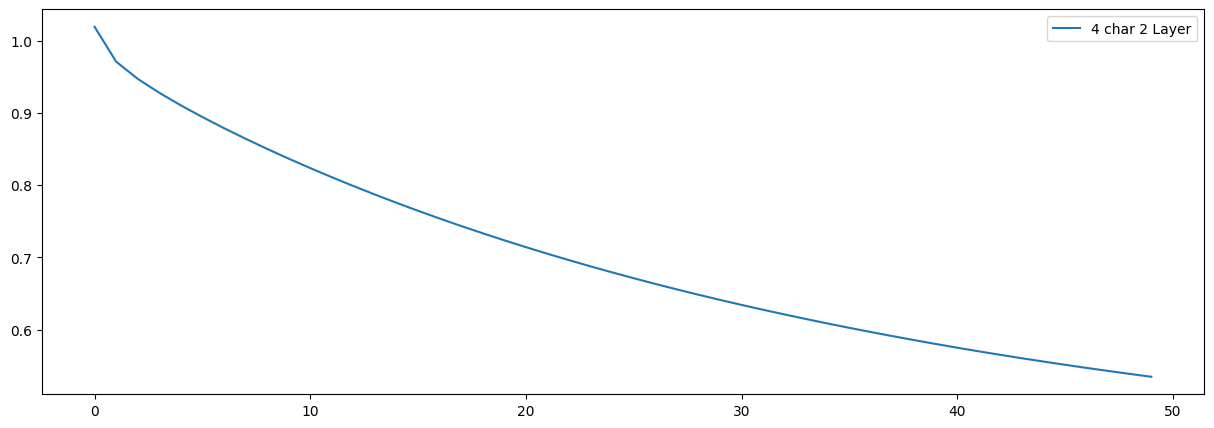

In [49]:
plt.figure(figsize=(15,5))
plt.plot(loss_vec,label='4 char 2 Layer')
plt.legend()

In [52]:
text_100

'កាលពីព្រេងនាយមានមនុស្សម្នាក់ឈ្មោះគង់មានប្រពន្ធពីរនាក់ ១ឈ្មោះនាងអាំ មួយឈ្មោះនាងគំ។ ថៃ្ងមួយអ្នកគង់ នាំ'

In [53]:
len(text)

6809

In [57]:
# accuracy evaluation
correct=0
total=0
with torch.no_grad():
  for i in range(len(text_100)-seq_length):
    x=text[i:i+seq_length]
    y=text[i+seq_length]
    input=torch.tensor([char_to_idx[char] for char in x],dtype=torch.long)
    output=model(input)
    _,predicted=torch.max(output.data,0)
    total+=1
    if predicted.item()==char_to_idx[y]:
      correct+=1
    
    print(f'Predicted: {idx_to_char[predicted.item()]}, Actual: {y}')
accuracy=100*correct/total
print(f'Accuracy of the model on the text: {accuracy} %')

Predicted: ី, Actual: ី
Predicted: ព, Actual: ព
Predicted: ្, Actual: ្
Predicted: រ, Actual: រ
Predicted: េ, Actual: េ
Predicted: ង, Actual: ង
Predicted: ន, Actual: ន
Predicted: ា, Actual: ា
Predicted: យ, Actual: យ
Predicted: ម, Actual: ម
Predicted: ា, Actual: ា
Predicted: ន, Actual: ន
Predicted: ន, Actual: ម
Predicted: ន, Actual: ន
Predicted: ុ, Actual: ុ
Predicted: ស, Actual: ស
Predicted: ្, Actual: ្
Predicted: ស, Actual: ស
Predicted: ម, Actual: ម
Predicted: ្, Actual: ្
Predicted: ន, Actual: ន
Predicted: ា, Actual: ា
Predicted: ម, Actual: ក
Predicted: ់, Actual: ់
Predicted: ទ, Actual: ឈ
Predicted: ្, Actual: ្
Predicted: ម, Actual: ម
Predicted: ោ, Actual: ោ
Predicted: ះ, Actual: ះ
Predicted: គ, Actual: គ
Predicted: ង, Actual: ង
Predicted: ់, Actual: ់
Predicted: ហ, Actual: ម
Predicted: ា, Actual: ា
Predicted: ន, Actual: ន
Predicted: ប, Actual: ប
Predicted: ្, Actual: ្
Predicted: រ, Actual: រ
Predicted: ព, Actual: ព
Predicted: ន, Actual: ន
Predicted: ្, Actual: ្
Predicted: ធ, Ac

In [59]:
# F1 Score evaluation
from sklearn.metrics import f1_score
all_preds=[]
all_labels=[]

with torch.no_grad():
  for i in range(len(text_100)-seq_length):
    x=text[i:i+seq_length]
    y=text[i+seq_length]
    input=torch.tensor([char_to_idx[char] for char in x],dtype=torch.long)
    output=model(input)
    _,predicted=torch.max(output.data,0)
    all_preds.append(predicted.item())
    all_labels.append(char_to_idx[y])

f1=f1_score(all_labels,all_preds,average='weighted')
print(f'F1 Score of the model on the text: {f1*100} %')

F1 Score of the model on the text: 88.76736111111111 %
